In [140]:
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [141]:
data = yf.download("NVDA", start="2022-01-01", end="2024-01-01")


[*********************100%%**********************]  1 of 1 completed


In [142]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()

data['Std_20']= data['Close'].rolling(window=20).std()

data['upper_band']= data['SMA_20'] + data['Std_20']
data['lower_band']= data['SMA_20'] - data['Std_20']


In [143]:
data['Signal'] = np.where(data['Close'] < data['SMA_20'], 1, 0)
data['Signal'] = np.where(data['Close'] > data['SMA_20'], -1, data['Signal'])

In [144]:
#Simulating cash and portfolio

initial_cash= 10000
cash = initial_cash
position=0
portfolio_value = cash
trade_history= []
portfolio_values = [initial_cash]
cumulative_returns = [0]

In [145]:
for i in range(1,len(data)):
    signal=data['Signal'].iloc[i]
    price=data['Close'].iloc[i]

    if signal ==1 and position==0:
        position=cash // price
        cash -= position * price
        trade_history.append(('BUY', data.index[i], price, position))

    elif signal == -1 and position > 0:
        cash += position * price
        trade_history.append(('SELL', data.index[i], price, position))
        position = 0  

    portfolio_value = cash + position * price
    portfolio_values.append(portfolio_value)

    if len(portfolio_values) > 1:
        daily_return = (portfolio_value / portfolio_values[-2]) - 1
    else:
        daily_return = 0
    cumulative_returns.append(daily_return)

data['Portfolio_Value'] = portfolio_values[:len(data)]
data['Cumulative_Returns'] = np.cumprod(1 + np.array(cumulative_returns)) - 1

print("Final Portfolio Value: ", portfolio_value)
print("Trade History: ", trade_history)

Final Portfolio Value:  7391.424826622009
Trade History:  [('BUY', Timestamp('2022-01-31 00:00:00'), 24.486000061035156, 408.0), ('SELL', Timestamp('2022-02-08 00:00:00'), 25.107999801635742, 408.0), ('BUY', Timestamp('2022-02-11 00:00:00'), 23.948999404907227, 428.0), ('SELL', Timestamp('2022-02-14 00:00:00'), 24.267000198364258, 428.0), ('BUY', Timestamp('2022-02-18 00:00:00'), 23.642000198364258, 439.0), ('SELL', Timestamp('2022-03-16 00:00:00'), 24.496000289916992, 439.0), ('BUY', Timestamp('2022-04-06 00:00:00'), 24.406999588012695, 441.0), ('SELL', Timestamp('2022-05-26 00:00:00'), 17.85099983215332, 441.0), ('BUY', Timestamp('2022-06-10 00:00:00'), 16.974000930786133, 463.0), ('SELL', Timestamp('2022-07-15 00:00:00'), 15.76200008392334, 463.0), ('BUY', Timestamp('2022-08-09 00:00:00'), 17.086000442504883, 427.0), ('SELL', Timestamp('2022-08-10 00:00:00'), 18.097000122070312, 427.0), ('BUY', Timestamp('2022-08-19 00:00:00'), 17.849000930786133, 433.0), ('SELL', Timestamp('2022-10

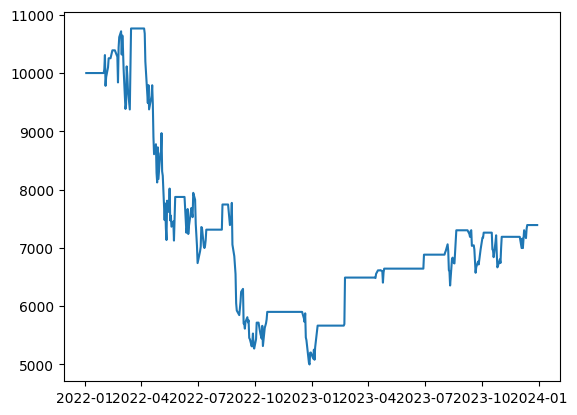

In [146]:
plt.plot(data['Portfolio_Value'])

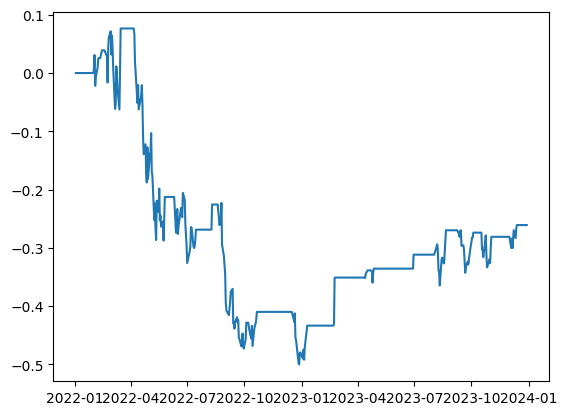

In [147]:
plt.plot(data['Cumulative_Returns'])